In [1]:
import numpy as np
from pydgrid import grid
from pydgrid.pydgrid import phasor2time, pq
import matplotlib.pyplot as plt
plt.style.use('presentation.mplstyle') # copy simlink from this folder
%matplotlib notebook
colors_cycle=plt.rcParams.get('axes.prop_cycle')
colors = [item['color'] for item in colors_cycle]

In [18]:
p_ref = 600.0e3
q_ref = 200.0e3

data = {
"lines":[
        {"bus_j": "Bus_1",  "bus_k": "Bus_2",  "code": "UG1w3", "m": 200},
        {"bus_j": "Bus_1",  "bus_k": "Bus_3",  "code": "UG1w3", "m": 200}
        ],
"buses":[
        {"bus": "Bus_1",  "pos_x":   0.0, "pos_y": 0, "units": "m", "U_kV":0.4},
        {"bus": "Bus_2",  "pos_x": 110.0, "pos_y": 20, "units": "m", "U_kV":0.4},
        {"bus": "Bus_3",  "pos_x": 110.0, "pos_y":-20, "units": "m", "U_kV":0.4}
        ],
"grid_formers":[
        {"bus": "Bus_1",
        "bus_nodes": [1, 2, 3], "deg": [  18.43101738, -103.41207707, 144.94884128],
        "kV": [ 0.24982762, 0.21600212, 0.22831829]}
        ],
"grid_feeders":[{"bus": "Bus_2","bus_nodes": [1, 2, 3],
                "kW": [0,0,0], "kvar": [0,0,0],
                "kA": [0,0,0], "phi_deg":[30, 30, 30]},
                {"bus": "Bus_3","bus_nodes": [1, 2, 3],
                    "type":"vsc","control_type":"pq_lipo",
                    "kW": p_ref/1000, "kvar": q_ref/1000,
                    "L":400e-6, "R":0.01,"V_dc":800.0}
                ],
"line_codes":
    {"pry_al_50":  {"R1":0.8,    "X1":	0.148, "R0":0.8,   "X0":	0.148},
     "pry_al_95":  {"R1":0.403,  "X1":	0.129, "R0":0.403, "X0":	0.129},
     "pry_al_120": {"R1":0.321,  "X1":	0.123, "R0":0.321, "X0":	0.321},
     "pry_al_185": {"R1":0.209,  "X1":	0.113, "R0":0.209, "X0":	0.209},
     "pry_al_300": {"R1":0.128,  "X1":	0.105, "R0":0.128, "X0":	0.128}
     },
}

In [19]:
sys1 = grid()
sys1.read(data)  # Load data
sys1.pf()  # solve power flow
sys1.get_v()      # post process voltages
sys1.get_i()      # post process currents

v_2_a,v_2_b,v_2_c,t = phasor2time(sys1.v_abc('Bus_3'))
i_2_a,i_2_b,i_2_c,t = phasor2time(sys1.i_abc('Bus_3'))
p,q,q_lipo,t = pq(sys1.v_abc('Bus_3'),sys1.i_abc('Bus_3'))

<IPython.core.display.Javascript object>


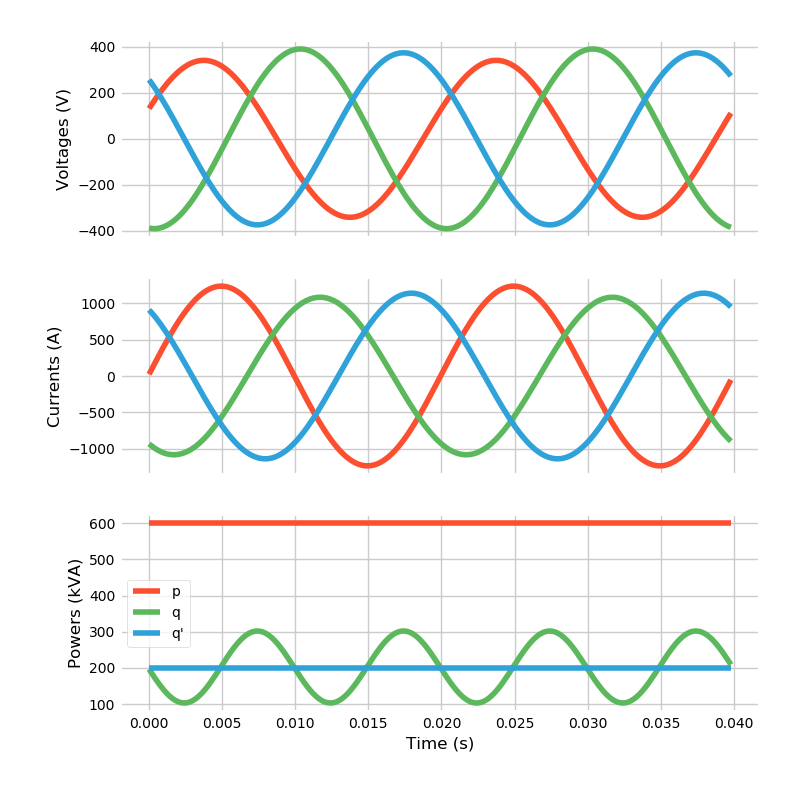

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex = True)

axes[0].plot(t, v_2_a)
axes[0].plot(t, v_2_b)
axes[0].plot(t, v_2_c)

axes[1].plot(t, i_2_a)
axes[1].plot(t, i_2_b)
axes[1].plot(t, i_2_c)

axes[2].plot(t, p/1000, label='p')
axes[2].plot(t, q/1000, label='q')
axes[2].plot(t, q_lipo/1000, label="q'")

axes[0].set_ylabel('Voltages (V)')
axes[1].set_ylabel('Currents (A)')
axes[2].set_ylabel('Powers (kVA)')

axes[2].set_xlabel('Time (s)')

axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
axes[2].legend()

fig.savefig('out.svg', bbox_inches='tight')

In [21]:
np.exp(1j*np.pi/2)

(6.123233995736766e-17+1j)

In [6]:
1j*1

1j